# Hotel Reservations

_____________________________________________________________________________________________

I was provided with information about more than 100000 hotel reservations made by people around the world as an employee of a Portuguese company connected to hotels. From July 1, 2015, through August 31, 2017, data for two hotels are provided. Both establishments are situated in Portugal, the City Hotel in Lisbon, and the Resort Hotel in the Algarve region.

As a data scientist, it is my responsibility to analyze the data and make some careful observations about the numerous client bookings in order to contribute to changes that will assist prevent repeating mistakes and improve how customers are treated to make their stay memorable. The process of gathering and studying information about consumer behavior, tastes, and satisfaction in order to spot trends and insights that can be applied to enhance the customer experience.

With good visualising of data and finding predictive patterns, the information then can be conveyed to the marketing teams, other employees and executives. 

_____________________________________________________________________________________________

Data was obtained from Kaggel. \
URL: https://www.kaggle.com/datasets/mathsian/hotel-bookings

IMPORTANT: After converting to .html, the graphs that I plotted didn't get included in the file, thus you will notice some block boxes. To overcome this issue I have saved the graphs in .png format and uploaded them using the PIL library

_____________________________________________________________________________________________

All the libraries that will be required, are imported here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn import preprocessing
import numpy as np
import base64, io, IPython
from PIL import Image as PILImage

The dataset (hotel_bookings.csv) has been imported using pandas and visualised using a dataframe

In [2]:
df = pd.read_csv('/Users/amulya/Documents/AI/archive-6/hotel_bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


_____________________________________________________________________________________________

# Data Exploration

_____________________________________________________________________________________________

I have printed out the unique values for each column to see whether there are any values other than NaN values. 

In [5]:
for i in df.columns:
    print(df[i].unique())
    print(i)

['Resort Hotel' 'City Hotel']
hotel
[0 1]
is_canceled
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 235 194 261 260 2

After checking all the values it is confirmed that there are no unrecognisable values

_____________________________________________________________________________________________

Now I will check for the total number of NaN values in each column

In [6]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

4 columns have NaN values but there is one column with more than 50% of thier data missing.

This column will be dropped, while the other columns will be stored in a list

In [7]:
df['company'].isna().sum()

112593

In [8]:
null_list=[]

for i in df.columns:
    if df[i].isna().sum() !=0:
        
        if df[i].isna().sum() > 0.5*df.shape[0]:
            df = df.drop(i,axis=1)
            continue
        null_list.append(i)

In [9]:
null_list

['children', 'country', 'agent']

Remaining dataset size

In [10]:
df.shape

(119390, 31)

_____________________________________________________________________________________________

I will first separate the columns with categorical data to a new list because the NaN values cannot be updated until the categorical data is transformed to numerical data.

In [11]:
label_ = []
for i in df.columns:
    if df[i].dtypes != 'float64':
        if df[i].dtypes != 'int64':
            print(i)
            label_.append(i)

hotel
arrival_date_month
meal
country
market_segment
distribution_channel
reserved_room_type
assigned_room_type
deposit_type
customer_type
reservation_status
reservation_status_date


All categorical data will be converted to numerical data using "label-encoding". I wanted to save the original information so that I could convert it to initial data after the imputation process of NaN values, thus I utilized new variables for the label encoding.

In [12]:
# Encode Categorical Columns
l0=preprocessing.LabelEncoder()
df[label_[0]]=l0.fit_transform(df[label_[0]])
l1=preprocessing.LabelEncoder()
df[label_[1]]=l1.fit_transform(df[label_[1]])
l2=preprocessing.LabelEncoder()
df[label_[2]]=l2.fit_transform(df[label_[2]])
l3=preprocessing.LabelEncoder()
df[label_[3]]=l3.fit_transform(df[label_[3]])
l4=preprocessing.LabelEncoder()
df[label_[4]]=l4.fit_transform(df[label_[4]])
l5=preprocessing.LabelEncoder()
df[label_[5]]=l5.fit_transform(df[label_[5]])
l6=preprocessing.LabelEncoder()
df[label_[6]]=l6.fit_transform(df[label_[6]])
l7=preprocessing.LabelEncoder()
df[label_[7]]=l7.fit_transform(df[label_[7]])
l8=preprocessing.LabelEncoder()
df[label_[8]]=l8.fit_transform(df[label_[8]])
l9=preprocessing.LabelEncoder()
df[label_[9]]=l9.fit_transform(df[label_[9]])
l10=preprocessing.LabelEncoder()
df[label_[10]]=l10.fit_transform(df[label_[10]])
l11=preprocessing.LabelEncoder()
df[label_[11]]=l11.fit_transform(df[label_[11]])

In [13]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,3,0,NaN,0,2,0.00,0,0,1,121
1,1,0,737,2015,5,27,1,0,0,2,...,4,0,NaN,0,2,0.00,0,0,1,121
2,1,0,7,2015,5,27,1,0,1,1,...,0,0,NaN,0,2,75.00,0,0,1,122
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,304.0,0,2,75.00,0,0,1,122
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,240.0,0,2,98.00,0,1,1,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,1,35,30,2,5,2,...,0,0,394.0,0,2,96.14,0,0,1,919
119386,0,0,102,2017,1,35,31,2,5,3,...,0,0,9.0,0,2,225.43,0,2,1,920
119387,0,0,34,2017,1,35,31,2,5,2,...,0,0,9.0,0,2,157.71,0,4,1,920
119388,0,0,109,2017,1,35,31,2,5,2,...,0,0,89.0,0,2,104.40,0,0,1,920


The KNN imputer will now be used to approximate the NaN values. I choose KNN imputer because it identifies the best acceptable value for the NaN value and calculates the Euclidian distance, making it more accurate than Simple Imputer, which just averages the values of that particular column. Due to the size of the dataset, I have set the n_neighbors number to 5.

In [14]:
imputer = KNNImputer(n_neighbors=5)
df_new = pd.DataFrame(imputer.fit_transform(df))
df_new.columns = df.columns

In [15]:
df_new

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1.0,0.0,342.0,2015.0,5.0,27.0,1.0,0.0,0.0,2.0,...,3.0,0.0,20.0,0.0,2.0,0.00,0.0,0.0,1.0,121.0
1,1.0,0.0,737.0,2015.0,5.0,27.0,1.0,0.0,0.0,2.0,...,4.0,0.0,1.0,0.0,2.0,0.00,0.0,0.0,1.0,121.0
2,1.0,0.0,7.0,2015.0,5.0,27.0,1.0,0.0,1.0,1.0,...,0.0,0.0,266.0,0.0,2.0,75.00,0.0,0.0,1.0,122.0
3,1.0,0.0,13.0,2015.0,5.0,27.0,1.0,0.0,1.0,1.0,...,0.0,0.0,304.0,0.0,2.0,75.00,0.0,0.0,1.0,122.0
4,1.0,0.0,14.0,2015.0,5.0,27.0,1.0,0.0,2.0,2.0,...,0.0,0.0,240.0,0.0,2.0,98.00,0.0,1.0,1.0,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.0,0.0,23.0,2017.0,1.0,35.0,30.0,2.0,5.0,2.0,...,0.0,0.0,394.0,0.0,2.0,96.14,0.0,0.0,1.0,919.0
119386,0.0,0.0,102.0,2017.0,1.0,35.0,31.0,2.0,5.0,3.0,...,0.0,0.0,9.0,0.0,2.0,225.43,0.0,2.0,1.0,920.0
119387,0.0,0.0,34.0,2017.0,1.0,35.0,31.0,2.0,5.0,2.0,...,0.0,0.0,9.0,0.0,2.0,157.71,0.0,4.0,1.0,920.0
119388,0.0,0.0,109.0,2017.0,1.0,35.0,31.0,2.0,5.0,2.0,...,0.0,0.0,89.0,0.0,2.0,104.40,0.0,0.0,1.0,920.0


Here I will check if all the NaN values are imputed or not

In [16]:
df_new.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

Since the sum of every column is 0, it means all the values have been successfully imputed.

After KNN imputation all the values were converted to float, but the label encoder assigned integers to the categorical values, thus it is important to convert those colmns back to integers.

In [17]:
for i in label_:
    df_new[i] = df_new[i].astype(int)

Here I have converted the numerical vaues back to the categorical values using Label Encoder to make theh visualisation of the data much more informative.

In [18]:
df_new[label_[0]]=l0.inverse_transform(df_new[label_[0]])
df_new[label_[1]]=l1.inverse_transform(df_new[label_[1]])
df_new[label_[2]]=l2.inverse_transform(df_new[label_[2]])
df_new[label_[3]]=l3.inverse_transform(df_new[label_[3]])
df_new[label_[4]]=l4.inverse_transform(df_new[label_[4]])
df_new[label_[5]]=l5.inverse_transform(df_new[label_[5]])
df_new[label_[6]]=l6.inverse_transform(df_new[label_[6]])
df_new[label_[7]]=l7.inverse_transform(df_new[label_[7]])
df_new[label_[8]]=l8.inverse_transform(df_new[label_[8]])
df_new[label_[9]]=l9.inverse_transform(df_new[label_[9]])
df_new[label_[10]]=l10.inverse_transform(df_new[label_[10]])
df_new[label_[11]]=l11.inverse_transform(df_new[label_[11]])

_____________________________________________________________________________________________

# Business Questions

_____________________________________________________________________________________________

## Question 1: 
What was the monthly trend in hotel bookings from 2015 to 2017?

I'm preparing the dataset even more in this section so that we can respond to the client company's business inquiries.\
The overall length of the guest's stay can be calculated by summing the number of nights spent during the week and the weekend.\
We can approximate the total number of guests the hotel anticipates by summing the number of adults and children in a certain booking.

In [19]:
df_new['total_stay_duration']=df_new['stays_in_week_nights']+df_new['stays_in_weekend_nights']
df_new['guests'] = df_new['adults']+df_new['children']+df_new['babies']
df_new['guests']=df_new['guests'].astype(int)
df_new['total_stay_duration']=df_new['total_stay_duration'].astype(int)

As the dataset contains information on two different hotel types—City Hotels and Resort Hotels—and bookings for those hotels for the years 2015 to 2017, it would be simpler to divide the dataset into years for better data management.

I created three distinct lists that each contain the total number of guests for each month of the year in order to determine the monthly pattern of hotel bookings over the course of the three years. Since the dataset contains data from 1 July 2015 to 31 August 2017, some months in 2015 and 2017 lack guest booking information.

In [20]:
df_2017 = df_new[df_new['arrival_date_year']==2017]
df_2016 = df_new[df_new['arrival_date_year']==2016]
df_2015 = df_new[df_new['arrival_date_year']==2015]
months = df_new['arrival_date_month'].unique()
guests_sum_2017 = []
guests_sum_2016 = []
guests_sum_2015 = []

for i in months:
    guests_sum_2017.append(sum(df_2017[df_2017['arrival_date_month']==i]['guests']))
    guests_sum_2016.append(sum(df_2016[df_2016['arrival_date_month']==i]['guests']))
    guests_sum_2015.append(sum(df_2015[df_2015['arrival_date_month']==i]['guests']))

    


I used the matplotlib library throughout the notebook to visualize data. I've created three graphs in one to make comparisons easier, and I followed a similar style for the remaining questions as well.

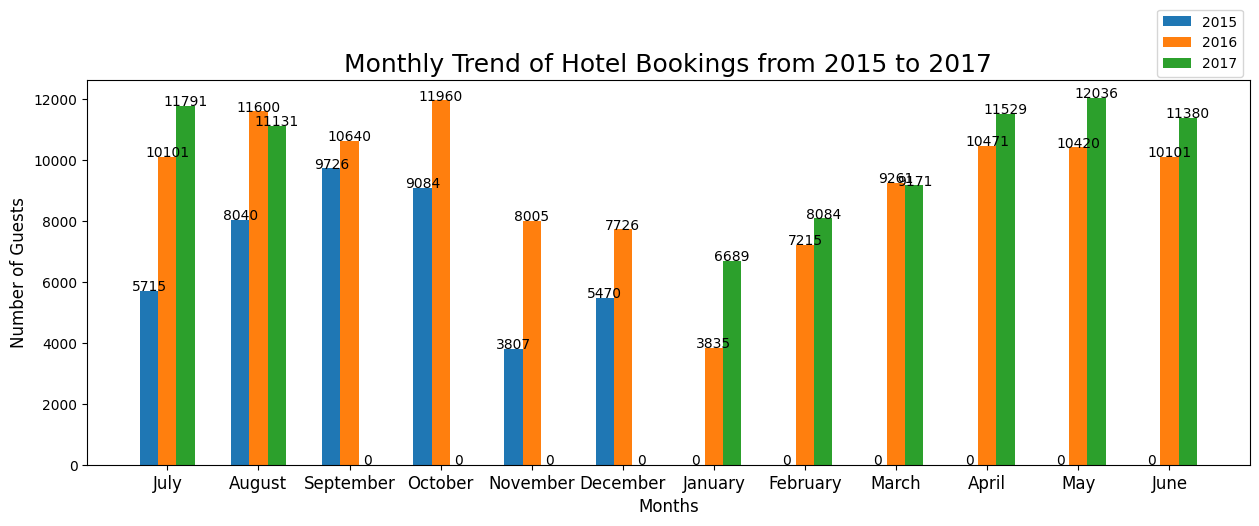

In [21]:
x = np.arange(len(months))
plt.figure(figsize=(15,5))
plt.style.use('default')
bar1 = plt.bar(x - 0.2, guests_sum_2015, 0.2, label = "2015") 
bar2 = plt.bar(x + 0, guests_sum_2016, 0.2, label = "2016")
bar3 = plt.bar(x + 0.2, guests_sum_2017, 0.2, label = "2017")
for rect in bar1 + bar2 + bar3: 
    height = rect.get_height()
    plt.text((rect.get_x() + rect.get_width() / 2), height, f'{height}',ha='center')
plt.xticks(x, months, fontsize=12) 
plt.xlabel("Months", fontsize =12) 
plt.ylabel("Number of Guests", fontsize =12) 
plt.title("Monthly Trend of Hotel Bookings from 2015 to 2017", fontsize=18) 
plt.legend( fontsize =10, facecolor ='white',bbox_to_anchor=(1.0, 1.2)) 
plt.show()



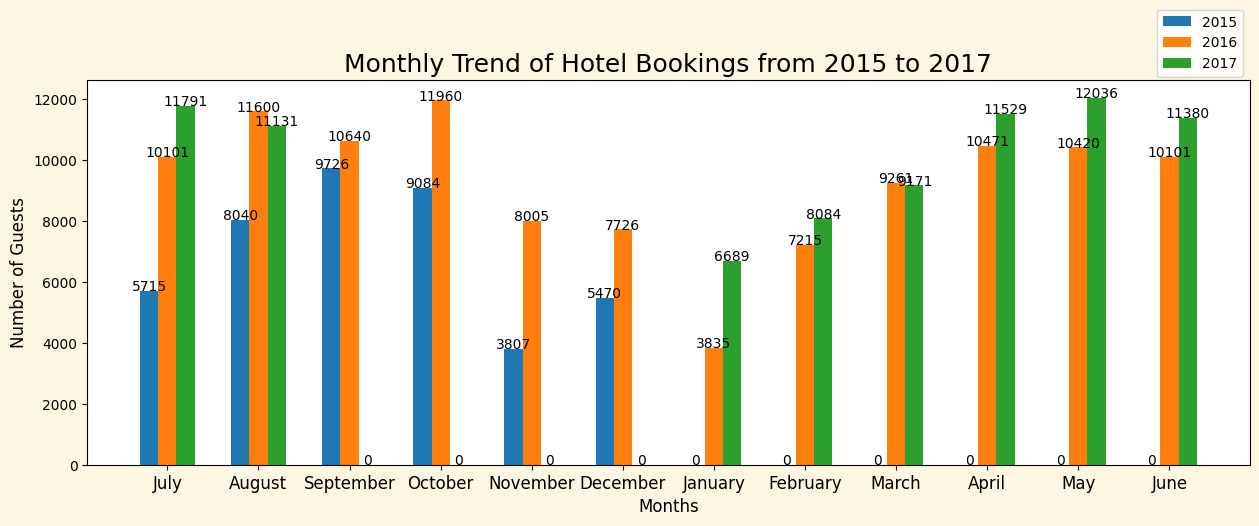

In [22]:
image1 = PILImage.open('/Users/amulya/Documents/AI/1st.png')
output1 = io.BytesIO()
image1.save(output1, format='PNG')
encoded_string1 = base64.b64encode(output1.getvalue()).decode()
html1 = '<img src="data:image/png;base64,{}"/>'.format(encoded_string1)
IPython.display.HTML(html1)

### Conclusions:
The greatest number of visitors to hotels was recorded in May 2017\
It has been noted that there have been much fewer reservations made throughout the winter months.


_____________________________________________________________________________________________

## Question 2: 
How many guests came back to the hotel, how many cancellations and how many bookings were confirmed in each of the hotels?

In [23]:
df_new['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

I created two new dataframes of both the hotels by slicing the original dataframe. \
Three new lists were also made which consist the sum of the categories asked in the question.

In [24]:
df_RH = df_new[df_new['hotel']=='Resort Hotel']
df_CH = df_new[df_new['hotel']=='City Hotel']
repeat_g = [int(sum(df_RH['is_repeated_guest'])),int(sum(df_CH['is_repeated_guest']))]
can = [int(sum(df_RH['previous_cancellations'])),int(sum(df_CH['previous_cancellations']))]
no_can = [int(sum(df_RH['previous_bookings_not_canceled'])),int(sum(df_CH['previous_bookings_not_canceled']))]



Visualisation using Bar Plot

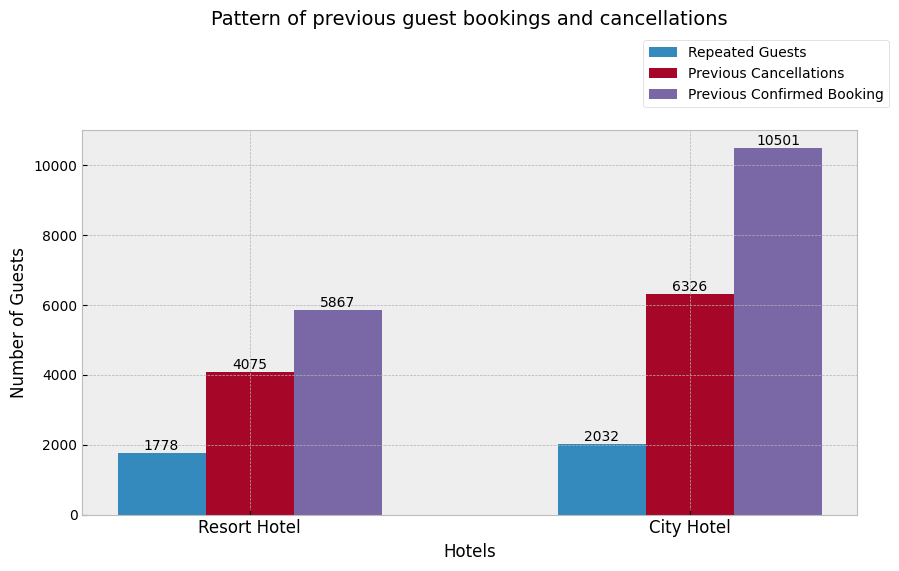

In [25]:
labels = ['Resort Hotel','City Hotel']
x_axis = np.arange(2)
plt.style.use('bmh')
plt.figure(figsize=(10,5))
b1 = plt.bar(x_axis - 0.2, repeat_g, 0.2, label = "Repeated Guests") 
b2 = plt.bar(x_axis + 0, can, 0.2, label = "Previous Cancellations")
b3 = plt.bar(x_axis + 0.2, no_can, 0.2, label = "Previous Confirmed Booking")
for rect in b1 + b2 + b3: 

    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, f'{height}', ha= 'center', va='bottom')
plt.xticks(x_axis, labels, fontsize=12) 
plt.xlabel("Hotels", fontsize =12) 
plt.ylabel("Number of Guests", fontsize =12) 
plt.title("Pattern of previous guest bookings and cancellations", fontsize=14, y = 1.25) 
plt.legend( fontsize =10, facecolor ='white',bbox_to_anchor=(1.05, 1.25)) 

 
plt.show()


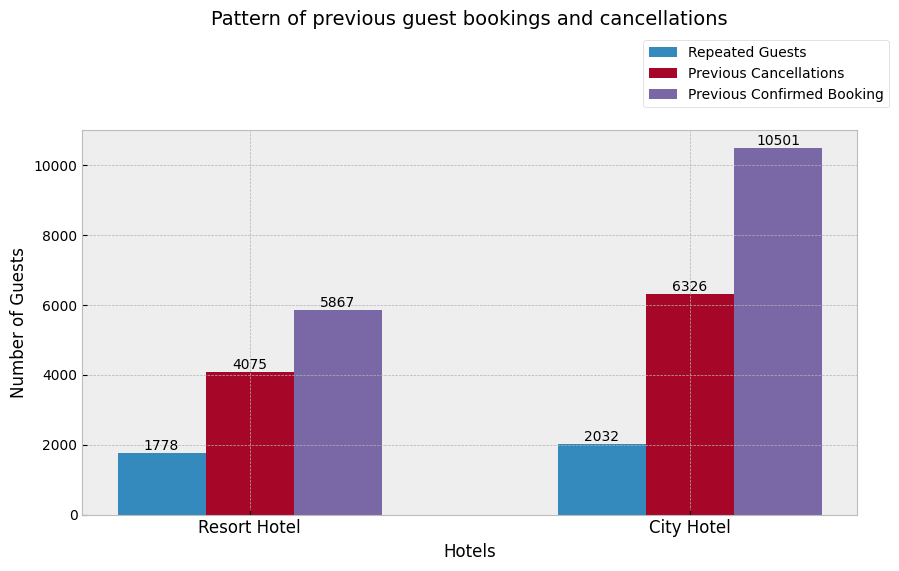

In [26]:
image2 = PILImage.open('/Users/amulya/Documents/AI/2nd.png')
output2 = io.BytesIO()
image2.save(output2, format='PNG')
encoded_string2 = base64.b64encode(output2.getvalue()).decode()
html2 = '<img src="data:image/png;base64,{}"/>'.format(encoded_string2)
IPython.display.HTML(html2)

### Conclusion:
The number of repeated visitors is far lower than the number of cancellations and previously confirmed reservations.\
Given the high number of cancellations, the client should take steps to better understand why customers are canceling their reservations and how to enhance their experiences while lowering the number of cancellations.


_____________________________________________________________________________________________

## Question 3: 
What is the average range of duration of guests across all hotels?

I created two different lists for both the hotels by sorting the number of days from smallest to largest. \
But to visualise data it is better to convert it into a dataframe and then plot it.

In [27]:

a = df_RH['total_stay_duration'].value_counts().sort_index()
b = df_CH['total_stay_duration'].value_counts().sort_index()


In [28]:
td_ch = pd.DataFrame(df_CH['total_stay_duration'].value_counts().sort_index())
td_ch = td_ch.rename({'total_stay_duration':'Frequency'},axis=1)
td_ch.index.name = 'Number of Days'


In [29]:
td_rh = pd.DataFrame(df_RH['total_stay_duration'].value_counts().sort_index())
td_rh = td_rh.rename({'total_stay_duration':'Frequency'},axis=1)
td_rh.index.name = 'Number of Days'



<AxesSubplot: title={'center': 'City Hotel'}, xlabel='Number of Days', ylabel='<--------Frequency-------->'>

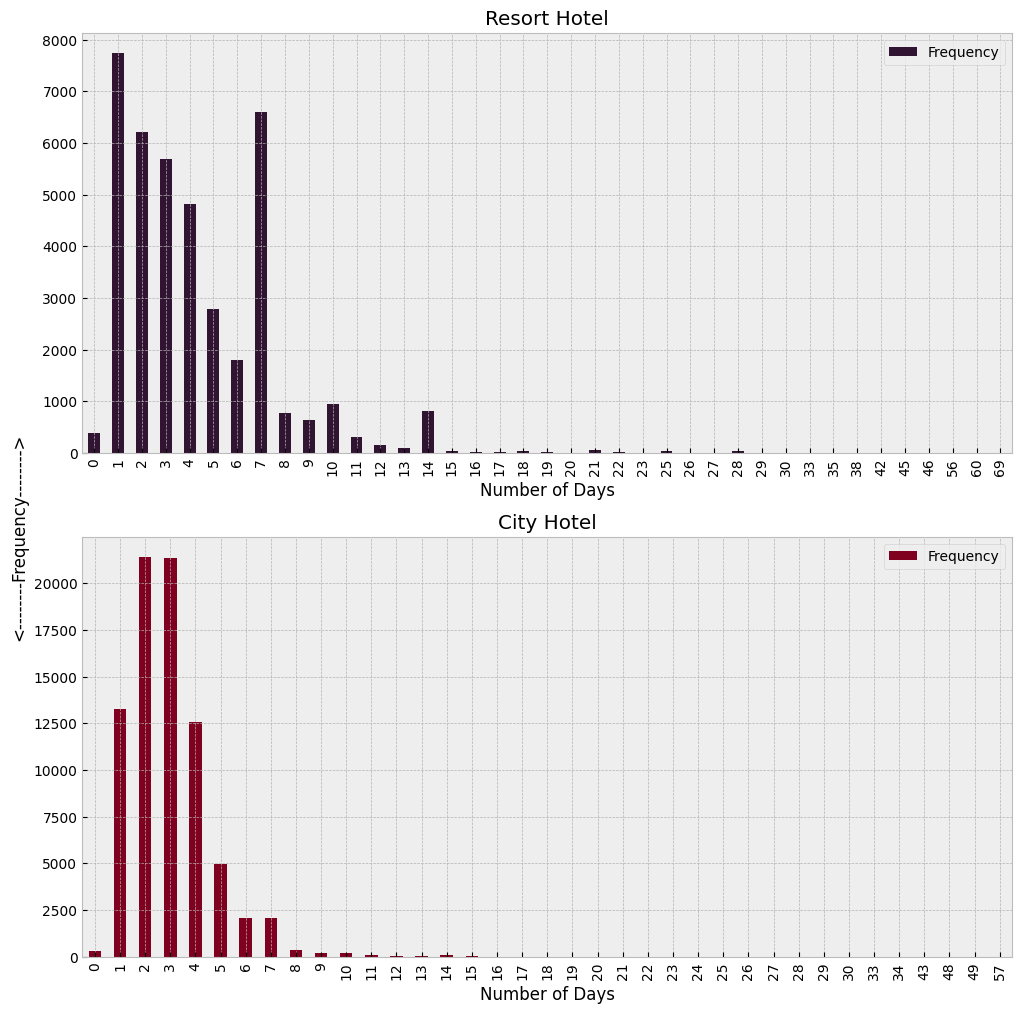

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(12,12))
td_rh.plot(kind='bar',ax=axes[0],color='#311432',title='Resort Hotel')
plt.xlabel("Hotels", fontsize =12) 
plt.ylabel("<--------Frequency-------->",fontsize =12, y=1) 
td_ch.plot(kind='bar',ax=axes[1],color ='#800020',title='City Hotel')


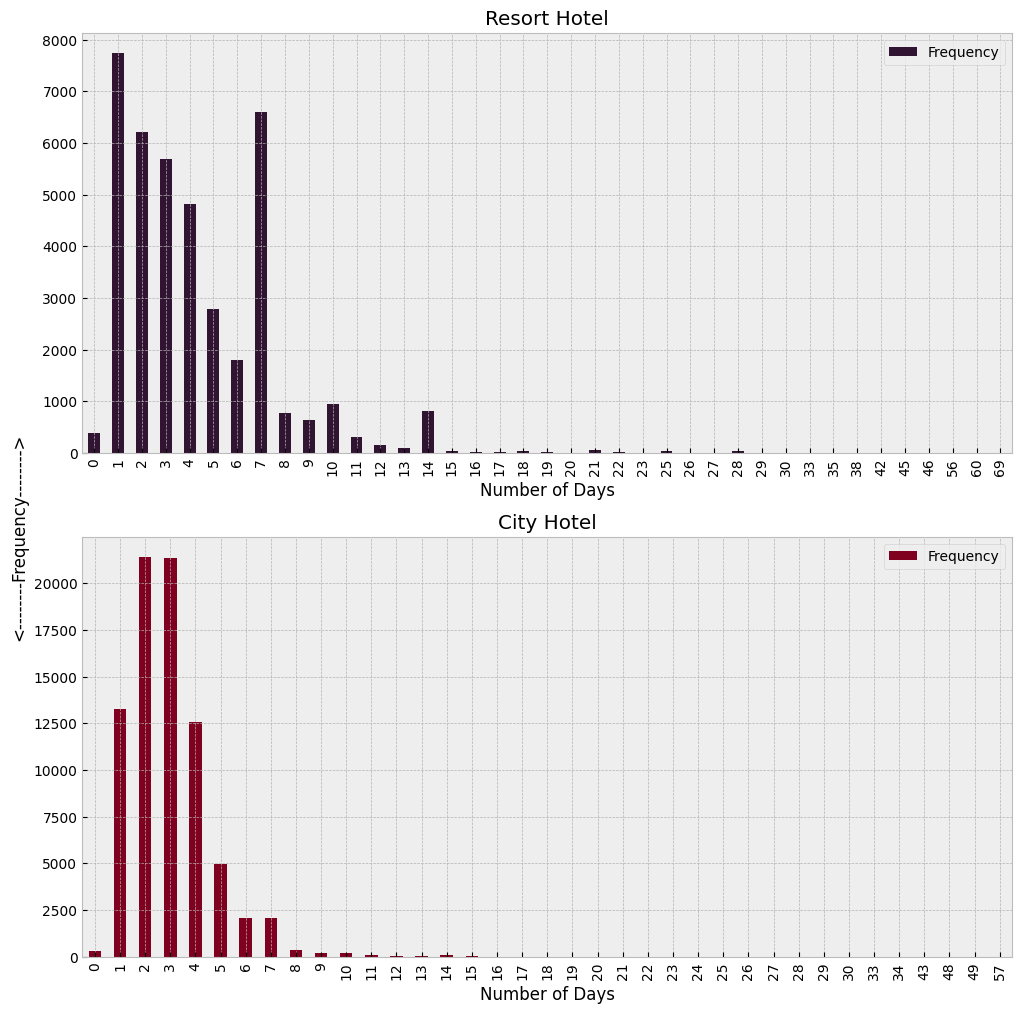

In [31]:
image3 = PILImage.open('/Users/amulya/Documents/AI/3rd.png')
output3 = io.BytesIO()
image3.save(output3, format='PNG')
encoded_string3 = base64.b64encode(output3.getvalue()).decode()
html3 = '<img src="data:image/png;base64,{}"/>'.format(encoded_string3)
IPython.display.HTML(html3)

### Conclusion: 
Most visitors stay for no more than a week.\
Additionally, some clients have stayed for longer than two months!

To get the average of the duration of the client in the hotel for a specific time period, I calculated the cumulative average.

In [32]:
df_RH['total_stay_duration'].expanding().mean()

0        0.000000
1        0.000000
2        0.333333
3        0.500000
4        0.800000
           ...   
40055    4.317655
40056    4.317822
40057    4.318064
40058    4.318305
40059    4.318547
Name: total_stay_duration, Length: 40060, dtype: float64

In [33]:
df_CH['total_stay_duration'].expanding().mean()

40060     2.000000
40061     3.000000
40062     3.333333
40063     4.000000
40064     3.600000
            ...   
119385    2.977914
119386    2.977965
119387    2.978015
119388    2.978066
119389    2.978142
Name: total_stay_duration, Length: 79330, dtype: float64

_____________________________________________________________________________________________

## Question 4: 
Where did the bookings come from in 2015,2016,2017?

The market_segment column contains information about the ways from which the customers had done their bookings.

In [34]:
markets=df_new['market_segment'].unique()

The various market-segment values and the overall number of reservations associated with those values are saved in a list by year.

In [35]:
mar_2017 = []
mar_2016 = []
mar_2015 = []

for i in markets:
    mar_2017.append(sum(df_2017['market_segment']==i))
    mar_2016.append(sum(df_2016['market_segment']==i))
    mar_2015.append(sum(df_2015['market_segment']==i))

Visualisation using Bar Plot:

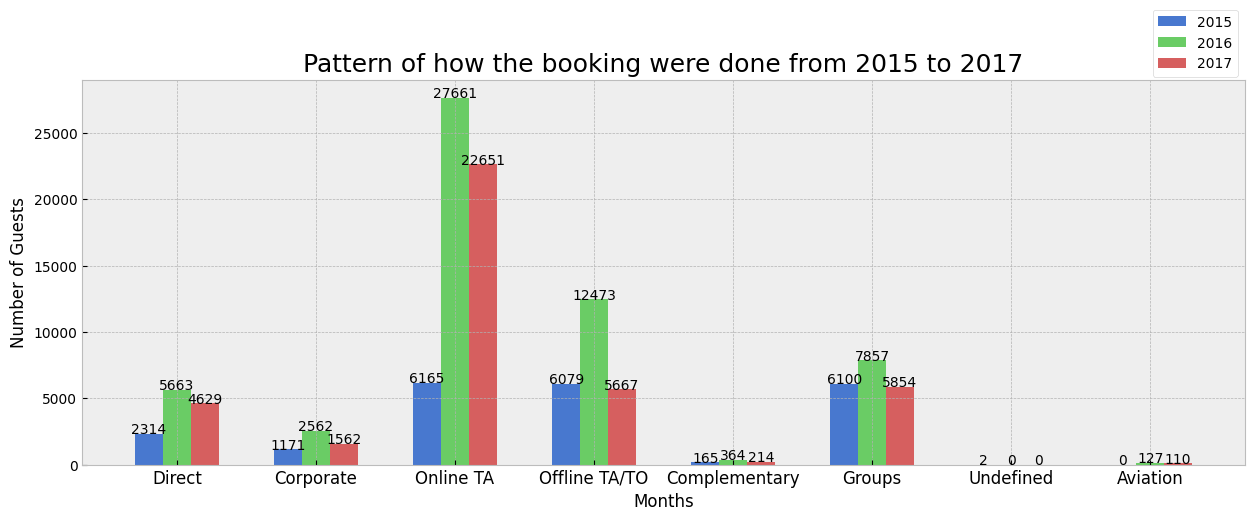

In [36]:
market = df_new['market_segment'].unique()
x = np.arange(len(markets))
plt.figure(figsize=(15,5))
plt.style.use('seaborn-v0_8-muted')
bar1 = plt.bar(x - 0.2, mar_2015, 0.2, label = "2015") 
bar2 = plt.bar(x + 0, mar_2016, 0.2, label = "2016")
bar3 = plt.bar(x + 0.2, mar_2017, 0.2, label = "2017")
for rect in bar1 + bar2 + bar3: 
    height = rect.get_height()
    plt.text((rect.get_x() + rect.get_width() / 2), height, f'{height}',ha='center')
plt.xticks(x, markets, fontsize=12) 
plt.xlabel("Months", fontsize =12) 
plt.ylabel("Number of Guests", fontsize =12) 
plt.title("Pattern of how the booking were done from 2015 to 2017", fontsize=18) 
plt.legend( fontsize =10, facecolor ='white',bbox_to_anchor=(1.0, 1.2)) 
plt.show()


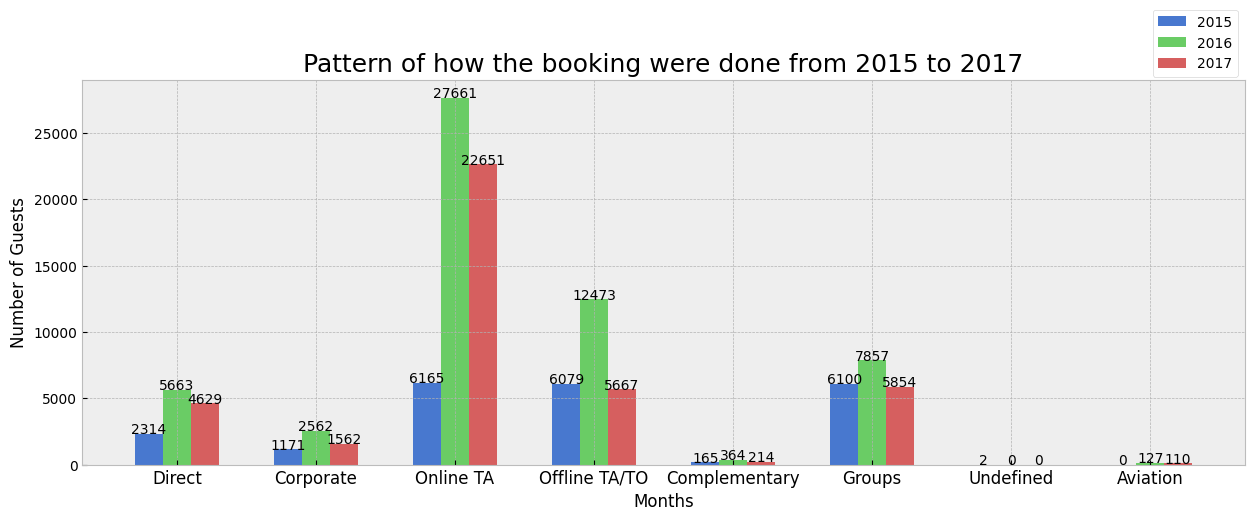

In [37]:
image4 = PILImage.open('/Users/amulya/Documents/AI/4th.png')
output4 = io.BytesIO()
image4.save(output4, format='PNG')
encoded_string4 = base64.b64encode(output4.getvalue()).decode()
html4 = '<img src="data:image/png;base64,{}"/>'.format(encoded_string4)
IPython.display.HTML(html4)

### Conclusion:
 Maximum number of bookings were done Online

_____________________________________________________________________________________________

## Question 5:
What has been the pattern of City Hotel and Resort Hotel bookings in 2015,2016,2017?

Before, we observed the trend of monthly hotel reservations; going forward, we will see the pattern of yearly reservations for each hotel.\
I've made three lists, one for each of the three years, that contain the total number of reservations made at each hotel.

In [38]:
years = df_new['arrival_date_year'].unique()
book_2017 =[]
book_2015 =[]
book_2016 = []
book_2017 = [int(sum(df_RH['arrival_date_year']==2017)),int(sum(df_CH['arrival_date_year']==2017))]
book_2016 = [int(sum(df_RH['arrival_date_year']==2016)),int(sum(df_CH['arrival_date_year']==2016))]
book_2015 = [int(sum(df_RH['arrival_date_year']==2015)),int(sum(df_CH['arrival_date_year']==2015))]


In [34]:
years

array([2015., 2016., 2017.])

Visualisation by Bar Plot

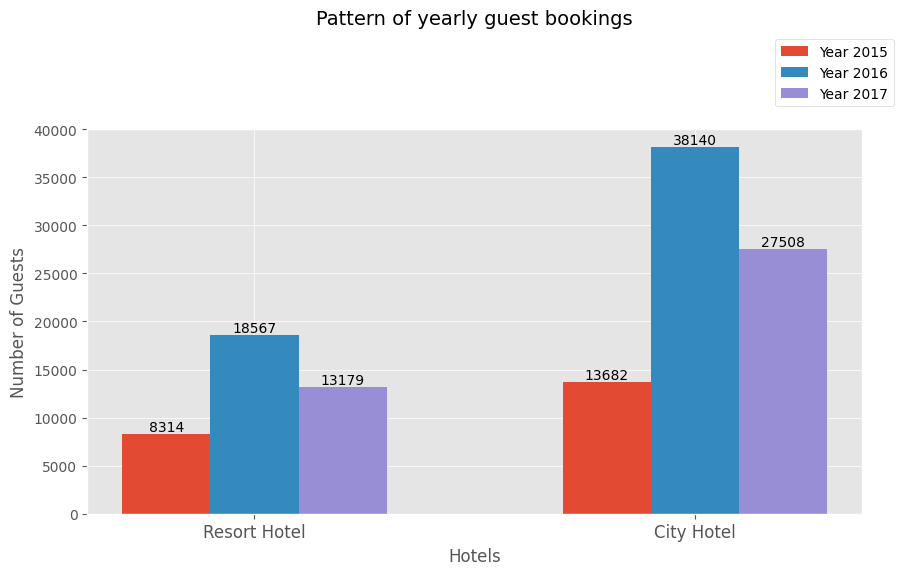

In [39]:
labels = ['Resort Hotel','City Hotel']
x_axis = np.arange(2)
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
b1 = plt.bar(x_axis - 0.2, book_2015, 0.2, label = "Year 2015") 
b2 = plt.bar(x_axis + 0, book_2016, 0.2, label = "Year 2016")
b3 = plt.bar(x_axis + 0.2, book_2017, 0.2, label = "Year 2017")
for rect in b1 + b2 + b3: 
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, f'{height}', ha= 'center', va='bottom')
plt.xticks(x_axis, labels, fontsize=12) 
plt.xlabel("Hotels", fontsize =12) 
plt.ylabel("Number of Guests", fontsize =12) 
plt.title("Pattern of yearly guest bookings", fontsize=14, y = 1.25) 
plt.legend( fontsize =10, facecolor ='white',bbox_to_anchor=(1.05, 1.25)) 



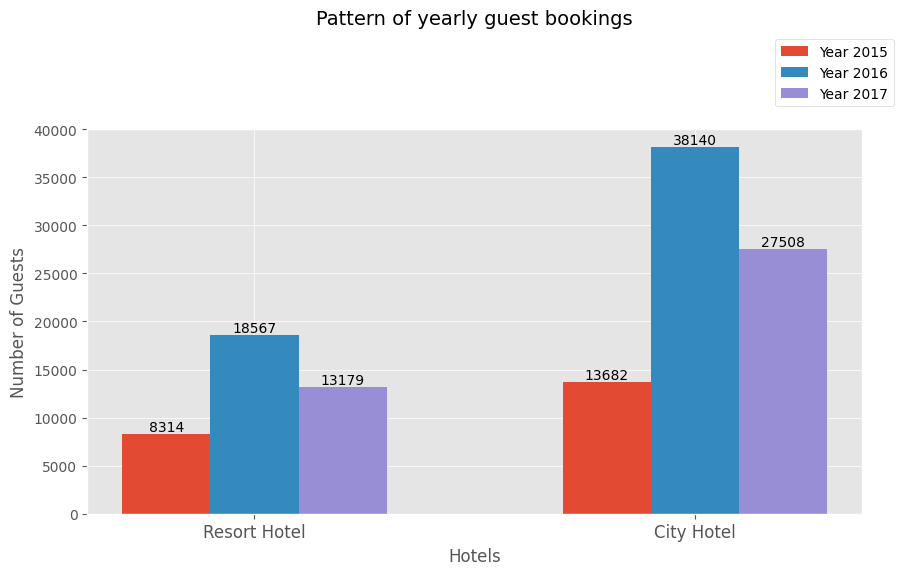

In [40]:
image5 = PILImage.open('/Users/amulya/Documents/AI/5th.png')
output5 = io.BytesIO()
image5.save(output5, format='PNG')
encoded_string5 = base64.b64encode(output5.getvalue()).decode()
html5 = '<img src="data:image/png;base64,{}"/>'.format(encoded_string5)
IPython.display.HTML(html5)

## Conclusion: 
City Hotel has had consistently more number of booking throuhgout the years.

_____________________________________________________________________________________________

## Question 6: 
Which country has the maximum and minimum number of hotel bookings?

We can obtain the total number of hotel reservations for each nation in descending order using value_counts. Hence, the first country has the most amount of reservations, while the bottom countries have the fewest.

In [36]:
df_new['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

Since value_counts return two values, which is a dictionary, we can store the keys and values in two different lists.

In [41]:
countries = df_new['country'].value_counts().keys().tolist()
bookings = df_new['country'].value_counts().tolist()

Printing the maximum and minimum value:

In [42]:
a =-1
print('Country with maximum number of hotel bookings  for the two hotels in Portugal is= ',countries[0])
print('Countries with maximum number of hotel bookings  for the two hotels in Portugal are = ')
for i in bookings:
    a =a+1
    if i == 1:
        print(countries[a])
    

Country with maximum number of hotel bookings  for the two hotels in Portugal is=  PRT
Countries with maximum number of hotel bookings  for the two hotels in Portugal are = 
KIR
SDN
NCL
AIA
ASM
FJI
ATF
LCA
GUY
PYF
DMA
SLE
MRT
NIC
BDI
PLW
MLI
CYM
BFA
MDG
MMR
NPL
BHS
UMI
SMR
DJI
BWA
HND
VGB
NAM


## Conclusion:
PRT which is Portugal, has the maximum number of booking, which is obvious because the hotels are based in Portugal.

_____________________________________________________________________________________________

## Question 7: 
In which month people required more special requests in 2015,2016,2017?

The total number of speacial requests have been appended two three different lists for each year according to the months

In [43]:
special_2017 =[]
special_2016 =[]
special_2015 =[]
for i in months:
    special_2017.append(sum(df_2017[df_2017['arrival_date_month']==i]['total_of_special_requests']))
    special_2016.append(sum(df_2016[df_2016['arrival_date_month']==i]['total_of_special_requests']))
    special_2015.append(sum(df_2015[df_2015['arrival_date_month']==i]['total_of_special_requests']))

Visualisation using bar plots

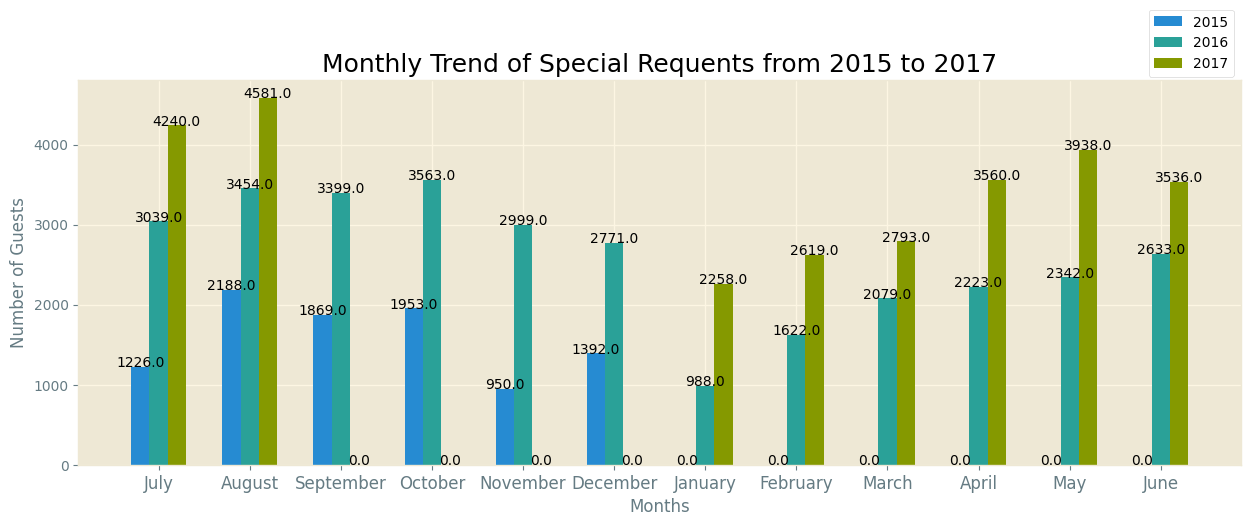

In [44]:
x = np.arange(len(months))
plt.figure(figsize=(15,5))
plt.style.use('Solarize_Light2')
bar1 = plt.bar(x - 0.2, special_2015, 0.2, label = "2015") 
bar2 = plt.bar(x + 0, special_2016, 0.2, label = "2016")
bar3 = plt.bar(x + 0.2, special_2017, 0.2, label = "2017")
for rect in bar1 + bar2 + bar3: 
    height = rect.get_height()
    plt.text((rect.get_x() + rect.get_width() / 2), height, f'{height}',ha='center')
plt.xticks(x, months, fontsize=12) 
plt.xlabel("Months", fontsize =12) 
plt.ylabel("Number of Guests", fontsize =12) 
plt.title("Monthly Trend of Special Requents from 2015 to 2017", fontsize=18) 
plt.legend( fontsize =10, facecolor ='white',bbox_to_anchor=(1.0, 1.2)) 
plt.show()


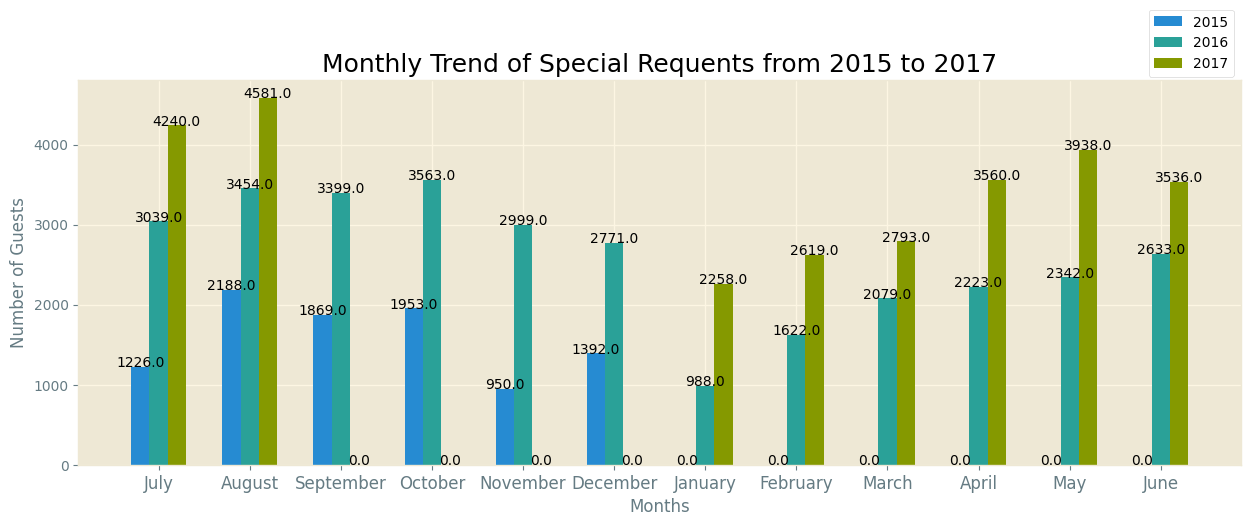

In [45]:
image6 = PILImage.open('/Users/amulya/Documents/AI/6th.png')
output6 = io.BytesIO()
image6.save(output6, format='PNG')
encoded_string6 = base64.b64encode(output6.getvalue()).decode()
html6 = '<img src="data:image/png;base64,{}"/>'.format(encoded_string6)
IPython.display.HTML(html6)

### Conclusion:
Customers make more specific demands in August. Also, the tendency of customized requests has grown significantly over time.

_____________________________________________________________________________________________

## Question 8: 
What is the Deposit Type in City Hotel and Resort Hotel?

There are three types of deposits

In [46]:
df_new['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

Using a pie chart the divisions for the three types of deposit have been drawn.

Text(0.5, 0.98, 'Deposit Type')

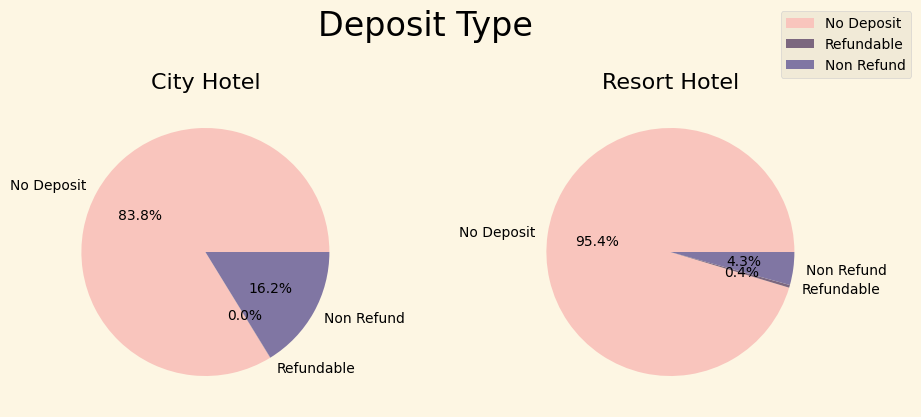

In [47]:
values = 'No Deposit', 'Refundable', 'Non Refund'
quantity_ch =[]
quantity_rh =[]
for i in values:
    quantity_ch.append(sum(df_CH['deposit_type']==i))
    quantity_rh.append(sum(df_RH['deposit_type']==i))
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(wspace=0.5) 
axes[0].pie(quantity_ch,labels=values,autopct='%1.1f%%',colors=['#f9c5bd', '#7c677f', '#8076a3'])
axes[0].set_title('City Hotel')
axes[1].pie(quantity_rh,labels=values,autopct='%1.1f%%',colors=['#f9c5bd', '#7c677f', '#8076a3'])
axes[1].set_title('Resort Hotel')
legend=plt.legend(bbox_to_anchor=(1.3, 1.3))
fig.suptitle('Deposit Type',fontsize=24)


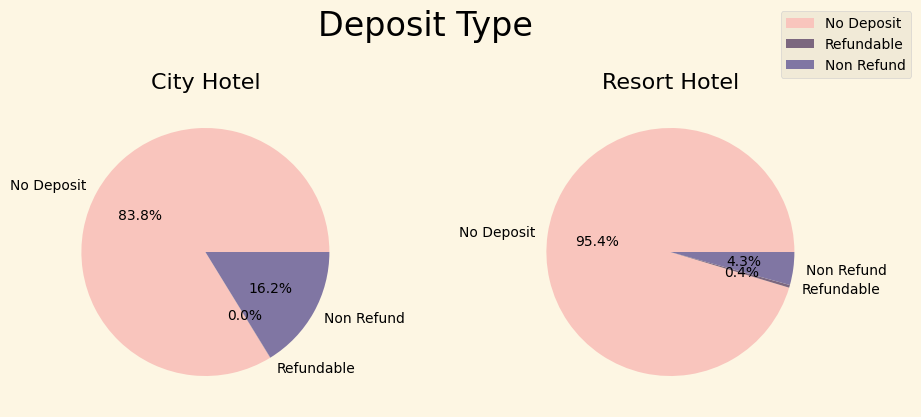

In [48]:
image7 = PILImage.open('/Users/amulya/Documents/AI/7th.png')
output7 = io.BytesIO()
image7.save(output7, format='PNG')
encoded_string7 = base64.b64encode(output7.getvalue()).decode()
html7 = '<img src="data:image/png;base64,{}"/>'.format(encoded_string7)
IPython.display.HTML(html7)

### Conclusion:
Mostly customers do not pay deposit while booking hotels, and there is almost no refundable deposit offered.


_____________________________________________________________________________________________

## Question 9: 
What is the monthly average of advance bookings in 2017,2016,2015?

The dataset's "lead time" column contains the number of days that clients reserved a hotel in advance.\
Three separate lists, each for a different monthly year, are used to categorize this information.

In [49]:
adbook_2015 =[]
adbook_2016 =[]
adbook_2017 =[]
for i in months:

    adbook_2015.append(sum(df_2015[df_2015['arrival_date_month'] == i]['lead_time']))
    adbook_2016.append(sum(df_2016[df_2016['arrival_date_month'] == i]['lead_time']))
    adbook_2017.append(sum(df_2017[df_2017['arrival_date_month'] == i]['lead_time']))

I've created three distinct for loops to discover the typical number of days of advanced booking for each year because the question asks us to calculate the average.

In [50]:
a =0
for i in adbook_2015:
    if i == 0:
        a =a+1
        continue
    else:
        adbook_2015[a] = adbook_2015[a]/len(df_2015[df_2015['arrival_date_month'] == months[a]]['lead_time'])
        a=a+1


In [51]:
a =0
for i in adbook_2016:
    if i == 0:
        a =a+1
        continue
    else:
        adbook_2016[a] = adbook_2016[a]/len(df_2016[df_2016['arrival_date_month'] == months[a]]['lead_time'])
        a=a+1

In [52]:
a =0
for i in adbook_2017:
    if i == 0:
        a =a+1
        continue
    else:
        adbook_2017[a] = adbook_2017[a]/len(df_2017[df_2017['arrival_date_month'] == months[a]]['lead_time'])
        a=a+1   

Using scatter plot the data has displayed for better visualisation.

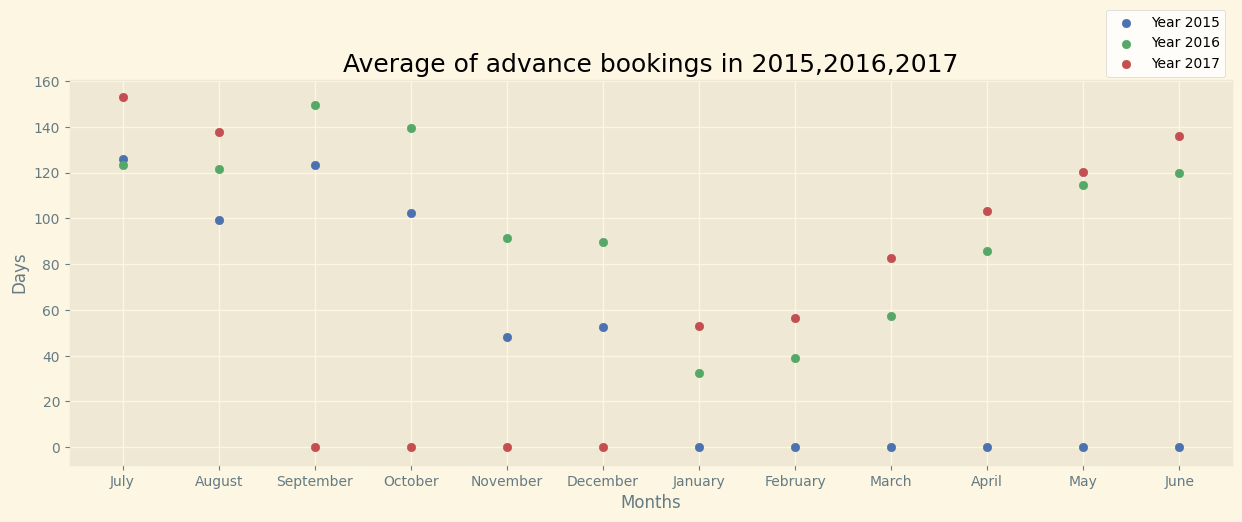

In [53]:
plt.figure(figsize=(15,5))
plt.style.use('seaborn-v0_8-deep')
sc1 =plt.scatter(months,adbook_2015)
sc2=plt.scatter(months,adbook_2016)
sc3=plt.scatter(months,adbook_2017)
plt.xlabel("Months", fontsize =12) 
plt.ylabel("Days", fontsize =12) 
plt.title("Average of advance bookings in 2015,2016,2017", fontsize=18) 
plt.legend( [sc1,sc2,sc3],['Year 2015','Year 2016','Year 2017'],fontsize =10, facecolor ='white',bbox_to_anchor=(1.0, 1.2)) 
plt.show()


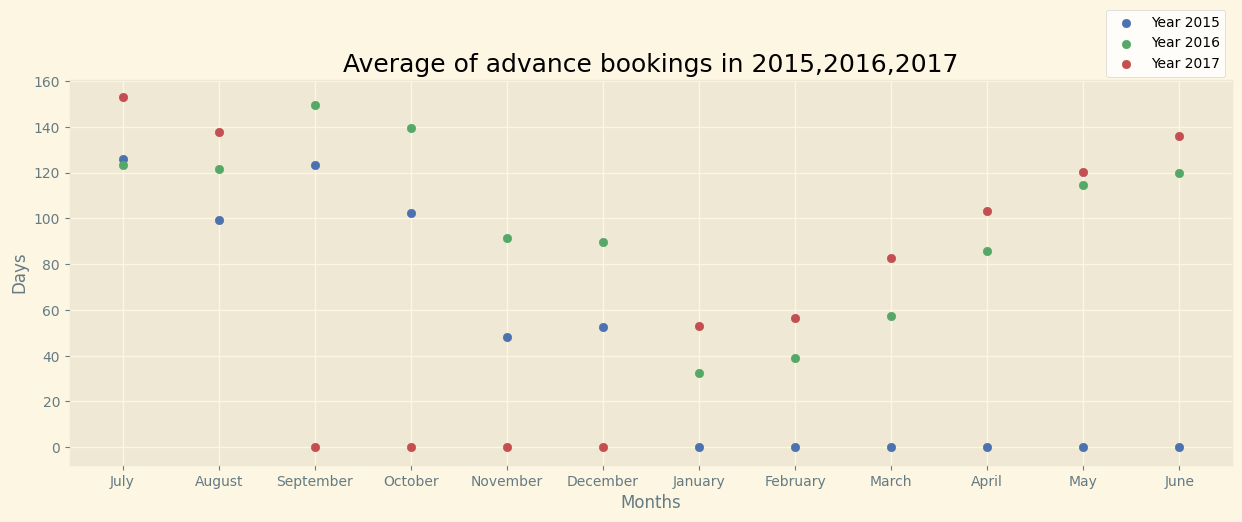

In [54]:
image8 = PILImage.open('/Users/amulya/Documents/AI/8th.png')
output8 = io.BytesIO()
image8.save(output8, format='PNG')
encoded_string8 = base64.b64encode(output8.getvalue()).decode()
html8 = '<img src="data:image/png;base64,{}"/>'.format(encoded_string8)
IPython.display.HTML(html8)

### Conclusion:
Every year the customers have been booking their rooms much more in advance than before.

_____________________________________________________________________________________________

## Question 10: 
What are the type of customers that book rooms in City Hotel and Resort Hotel over the years?

Type of customers were included in the column 'customer_type'

In [55]:
df_new['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

I have created four different lists with every type of customer for every hotel.

In [56]:
cus_trans =[]
cus_contract =[]
cus_transp =[]
cus_group =[]

cus_trans = [sum(df_CH['customer_type']=='Transient'),sum(df_RH['customer_type']=='Transient')]
cus_contract = [sum(df_CH['customer_type']=='Contract'),sum(df_RH['customer_type']=='Contract')]
cus_transp = [sum(df_CH['customer_type']=='Transient-Party'),sum(df_RH['customer_type']=='Transient-Party')]
cus_group = [sum(df_CH['customer_type']=='Group'),sum(df_RH['customer_type']=='Group')]

Visualisation using Bar Plots

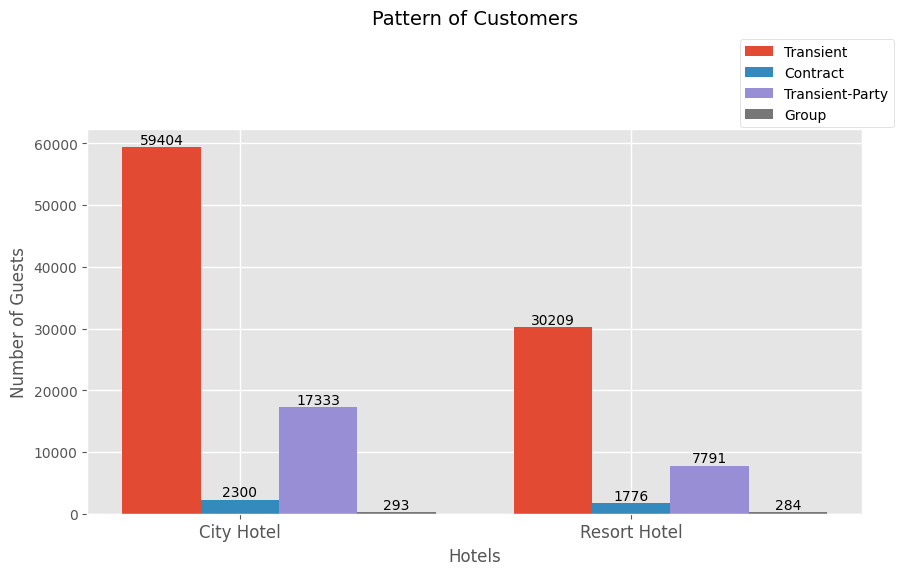

In [57]:
labels = ['City Hotel','Resort Hotel']
x_axis = np.arange(2)
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
b1 = plt.bar(x_axis - 0.2, cus_trans, 0.2, label = "Transient") 
b2 = plt.bar(x_axis + 0, cus_contract, 0.2, label = "Contract")
b3 = plt.bar(x_axis + 0.2, cus_transp, 0.2, label = "Transient-Party")
b4 = plt.bar(x_axis + 0.4, cus_group, 0.2, label = "Group")
for rect in b1 + b2 + b3 +b4: 
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, f'{height}', ha= 'center', va='bottom')
plt.xticks(x_axis, labels, fontsize=12) 
plt.xlabel("Hotels", fontsize =12) 
plt.ylabel("Number of Guests", fontsize =12) 
plt.title("Pattern of Customers", fontsize=14, y = 1.25) 
plt.legend( fontsize =10, facecolor ='white',bbox_to_anchor=(1.05, 1.25)) 


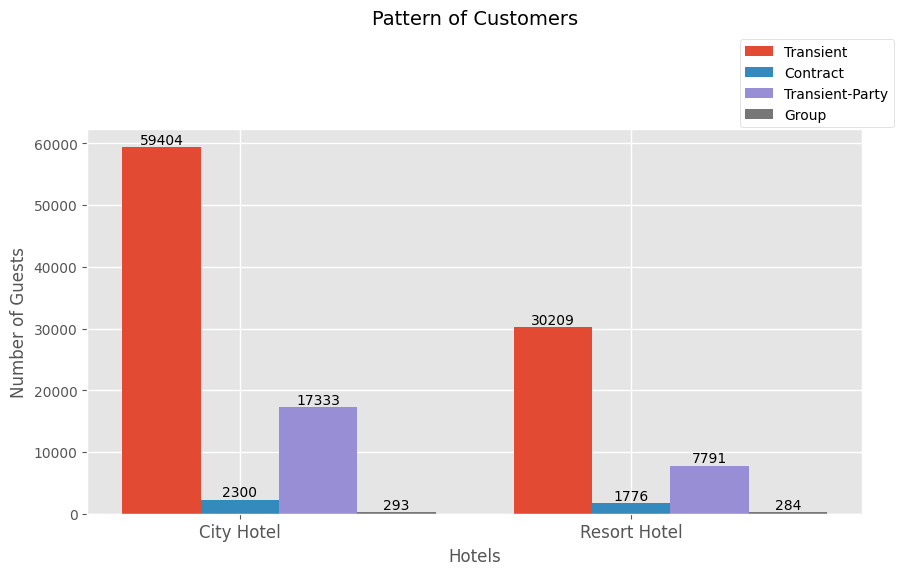

In [58]:
image9 = PILImage.open('/Users/amulya/Documents/AI/9th.png')
output9 = io.BytesIO()
image9.save(output9, format='PNG')
encoded_string9 = base64.b64encode(output9.getvalue()).decode()
html9 = '<img src="data:image/png;base64,{}"/>'.format(encoded_string9)
IPython.display.HTML(html9)

### Conclusion:
There have been more transient customers and very less group customers.

_____________________________________________________________________________________________

## Inference 

The two hotels have very different customer base, and have had more customers every year. There are certain drawbacks that were observed with the graphs which can be improved in the future to help reduce the cancellations of bookings.\
As for the dataset, if there could be information about the entire year, it would be much more fruitful. 

_____________________________________________________________________________________________